In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


### Breast Cancer Prediction with EDA
### Machine Learning

##### Import Libraries 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


#### Exploring the Data

In [5]:
df=pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print("Name of the columns    :>>",df.columns)
print(" ")
print(" ")
print("Basic Information about DataFrame   :>>",df.info())
print(" ")
print(" ")
print("Rows and Columns :>>",df.shape)

Name of the columns    :>> Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non

#### Feature Selection

#### Drop the columns ,Unnamed: 32 and id 

In [7]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

#### Data Cleaning

In [8]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

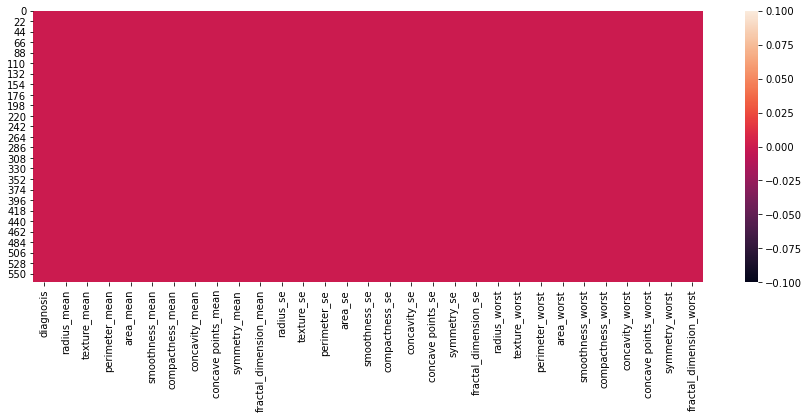

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna())

#### Data is Cleaned

### Feature Engineering

### Area Mean

#### We can see Outliers in area_mean and area_worst, as maximum value is too big


In [10]:
min_thresold, max_thresold = df.area_mean.quantile([0.01, 0.98])
df[df.area_mean < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
151,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.021680,0.2222,...,9.092,29.72,58.08,249.8,0.16300,0.43100,0.5381,0.07879,0.3322,0.14860
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
539,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,...,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
568,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [11]:
df[df.area_mean>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,M,27.42,26.27,186.9,2501.0,0.10840,0.1988,0.3635,0.16890,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


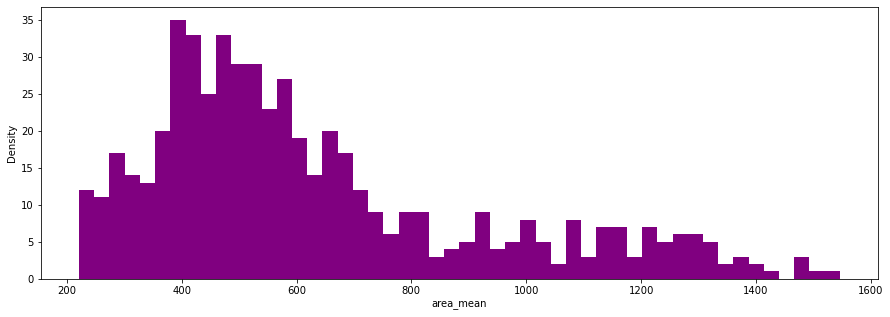

In [12]:
df= df[(df.area_mean < max_thresold) & (df.area_mean >min_thresold)]
plt.figure(figsize=(15,5))
plt.xlabel("area_mean")
plt.ylabel("Density")
plt.hist(df.area_mean,color='purple',bins=50)
plt.show()

### fractal_dimension_mean

In [13]:
min_thresold, max_thresold = df.fractal_dimension_mean.quantile([0.01, 0.99])
df[df.fractal_dimension_mean < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
119,M,17.95,20.01,114.2,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,...,20.58,27.83,129.2,1261.0,0.1072,0.1202,0.2249,0.1185,0.4882,0.06111
127,M,19.00,18.91,123.4,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,...,22.32,25.73,148.2,1538.0,0.1021,0.2264,0.3207,0.1218,0.2841,0.06541
210,M,20.58,22.14,134.7,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,...,23.24,27.84,158.3,1656.0,0.1178,0.2920,0.3861,0.1920,0.2909,0.05865
277,M,18.81,19.98,120.9,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,19.96,24.30,129.0,1236.0,0.1243,0.1160,0.2210,0.1294,0.2567,0.05737
321,M,20.16,19.66,131.1,1274.0,0.08020,0.08564,0.11550,0.07726,0.1928,...,23.06,23.03,150.2,1657.0,0.1054,0.1537,0.2606,0.1425,0.3055,0.05933
368,M,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.11680,0.08465,0.1717,...,30.75,26.44,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494


In [14]:
df[df.fractal_dimension_mean>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.1730
71,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084
152,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,...,11.020,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.1259
318,B,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.2330,...,10.060,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.1055
504,B,9.268,12.87,61.49,248.7,0.16340,0.2239,0.09730,0.05252,0.2378,...,10.280,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.10250,0.3038,0.1252
505,B,9.676,13.14,64.12,272.5,0.12550,0.2204,0.11880,0.07038,0.2057,...,10.600,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.10750,0.2848,0.1364


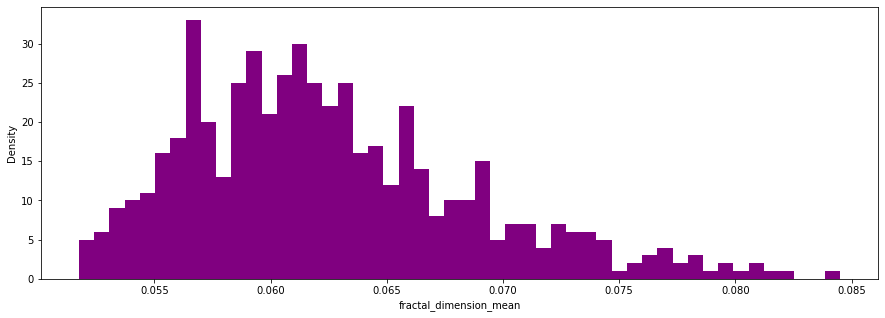

In [15]:
df= df[(df.fractal_dimension_mean < max_thresold) & (df.fractal_dimension_mean >min_thresold)]
plt.figure(figsize=(15,5))
plt.xlabel("fractal_dimension_mean")
plt.ylabel("Density")
plt.hist(df.fractal_dimension_mean,color='purple',bins=50)
plt.show()

### fractal_dimension_worst

In [16]:
min_thresold, max_thresold = df.fractal_dimension_worst.quantile([0.01, 0.9888])
df[df.fractal_dimension_worst < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
38,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.028990,0.1565,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.023980,0.028990,0.1565,0.05504
178,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
311,B,14.61,15.69,92.68,664.9,0.07618,0.03515,0.014470,0.018770,0.1632,...,16.46,21.75,103.70,840.8,0.10110,0.07087,0.047460,0.058130,0.2530,0.05695
360,B,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.016350,0.2233,0.05521
491,B,17.85,13.23,114.60,992.1,0.07838,0.06217,0.044450,0.041780,0.1220,...,19.82,18.42,127.10,1210.0,0.09862,0.09976,0.104800,0.083410,0.1783,0.05871
561,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.000000,0.000000,0.1566,0.05905


In [17]:
df[df.fractal_dimension_worst>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.2075
14,M,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.1431
31,M,11.84,18.70,77.93,440.6,0.1109,0.1516,0.1218,0.05182,0.2301,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.1402
105,M,13.11,15.56,87.21,530.2,0.1398,0.1765,0.2071,0.09601,0.1925,...,16.31,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.1986,0.3147,0.1405
190,M,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,...,15.74,37.18,106.40,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446
379,M,11.08,18.83,73.30,361.6,0.1216,0.2154,0.1689,0.06367,0.2196,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.1403
562,M,15.22,30.62,103.40,716.9,0.1048,0.2087,0.2550,0.09429,0.2128,...,17.52,42.79,128.70,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.1409


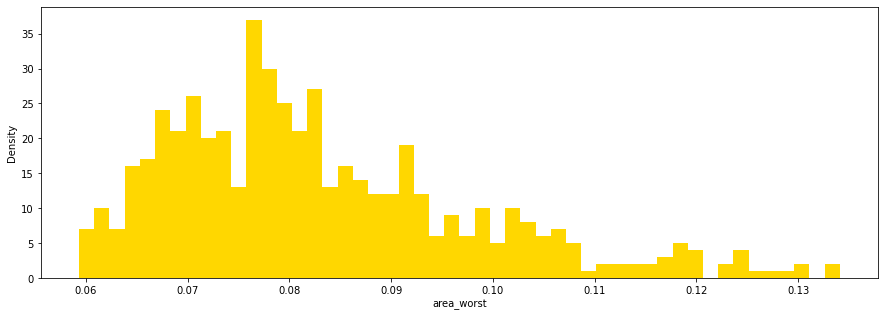

In [18]:
df= df[(df.fractal_dimension_worst < max_thresold) & (df.fractal_dimension_worst >min_thresold)]
plt.figure(figsize=(15,5))
plt.xlabel("area_worst")
plt.ylabel("Density")
plt.hist(df.fractal_dimension_worst,color='gold',bins=50)
plt.show()

### Area Worst

In [19]:
min_thresold, max_thresold = df.area_worst.quantile([0.0001, 0.998])
df[df.area_worst < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
314,B,8.597,18.6,54.09,221.2,0.1074,0.05847,0.0,0.0,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0,0.0,0.3142,0.08116


In [20]:
df[df.area_worst>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,M,21.16,23.04,137.2,1404.0,0.09428,0.1022,0.1097,0.08632,0.1769,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
265,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,0.1769,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218


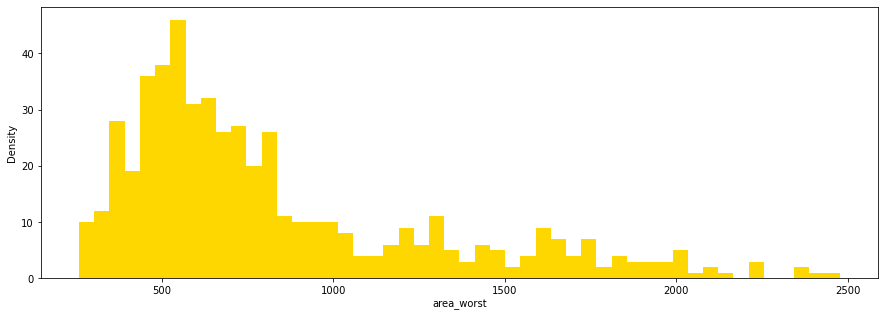

In [21]:
df= df[(df.area_worst < max_thresold) & (df.area_worst >min_thresold)]
plt.figure(figsize=(15,5))
plt.xlabel("area_worst")
plt.ylabel("Density")
plt.hist(df.area_worst,color='gold',bins=50)
plt.show()

### compactness_worst

In [22]:
min_thresold, max_thresold = df.compactness_worst.quantile([0.0001, 0.991])
df[df.compactness_worst < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
192,B,9.72,18.22,60.73,288.1,0.0695,0.02344,0.0,0.0,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559


In [23]:
df[df.compactness_worst>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
42,M,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,...,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.1038
72,M,17.20,24.52,114.2,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,...,23.32,33.82,151.6,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.1339
181,M,21.09,26.57,142.7,1311.0,0.11410,0.2832,0.2487,0.14960,0.2395,...,26.68,33.48,176.5,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.1284
430,M,14.90,22.53,102.1,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,...,16.35,27.57,125.4,832.7,0.1419,0.7090,0.9019,0.2475,0.2866,0.1155
567,M,20.60,29.33,140.1,1265.0,0.11780,0.2770,0.3514,0.15200,0.2397,...,25.74,39.42,184.6,1821.0,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240


(array([ 82., 107., 122.,  66.,  52.,  42.,  19.,  13.,   9.,   5.]),
 array([0.04619 , 0.111541, 0.176892, 0.242243, 0.307594, 0.372945,
        0.438296, 0.503647, 0.568998, 0.634349, 0.6997  ]),
 <a list of 10 Patch objects>)

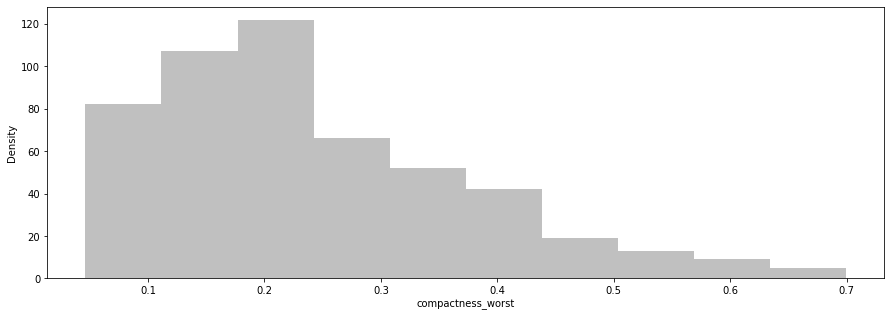

In [24]:
df= df[(df.compactness_worst < max_thresold) & (df.compactness_worst >min_thresold)]
plt.figure(figsize=(15,5))
plt.xlabel("compactness_worst")
plt.ylabel("Density")
plt.hist(df.compactness_worst,color='silver')

### concavity_worst

In [25]:
min_thresold, max_thresold = df.concavity_worst.quantile([0.01, 0.99])
df[df.concavity_worst < min_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [26]:
df[df.concavity_worst>max_thresold]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,B,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750
78,M,20.180,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
108,M,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
247,B,12.890,14.11,84.95,512.2,0.0876,0.1346,0.1374,0.03980,0.1596,...,14.39,17.70,105.0,639.1,0.1254,0.5849,0.7727,0.1561,0.2639,0.11780
252,M,19.730,19.82,130.70,1206.0,0.1062,0.1849,0.2417,0.09740,0.1733,...,25.28,25.59,159.8,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970
400,M,17.910,21.02,124.40,994.0,0.1230,0.2576,0.3189,0.11980,0.2113,...,20.80,27.78,149.6,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980


In [27]:
df= df[(df.concavity_worst < max_thresold) & (df.concavity_worst >min_thresold)]


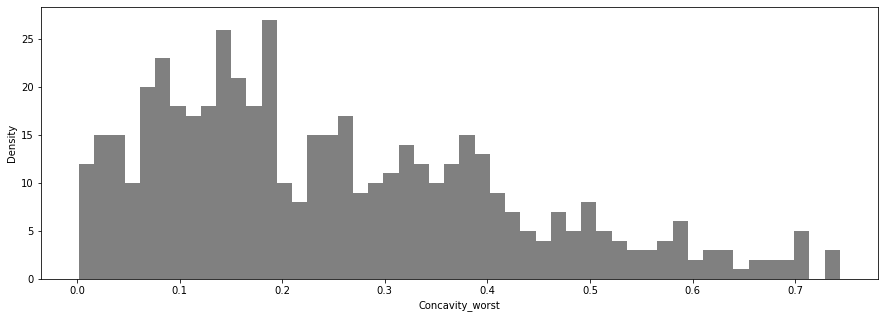

In [28]:
plt.figure(figsize=(15,5))
plt.xlabel("Concavity_worst")
plt.ylabel("Density")
plt.hist(df.concavity_worst,color='grey',bins=50)
plt.show()

## Symmetry Mean

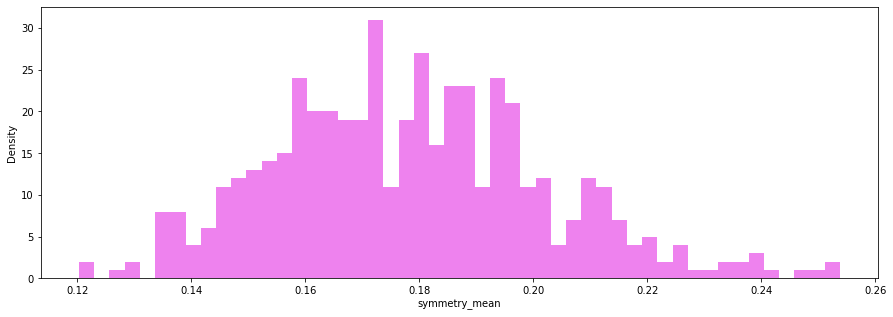

In [29]:
min_thresold, max_thresold = df.symmetry_mean.quantile([0.001, 0.99])
df[df.symmetry_mean < min_thresold]

df= df[(df.symmetry_mean < max_thresold) & (df.symmetry_mean >min_thresold)]

plt.figure(figsize=(15,5))
plt.xlabel("symmetry_mean")
plt.ylabel("Density")
plt.hist(df.symmetry_mean,color='violet',bins=50)
plt.show()

### Symmetry worst

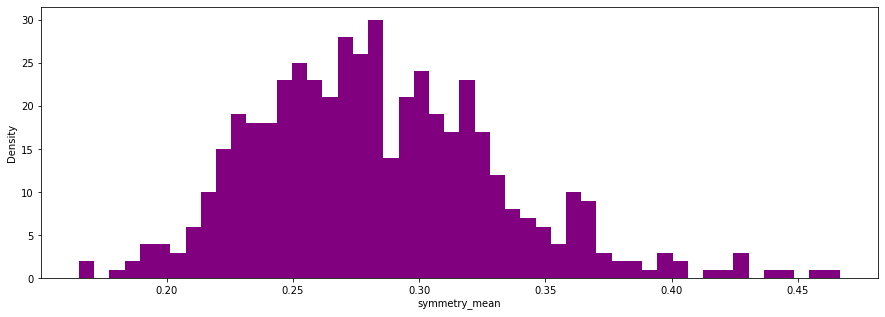

In [30]:
min_thresold, max_thresold = df.symmetry_worst.quantile([0.001, 0.99])
df[df.symmetry_worst < min_thresold]

df= df[(df.symmetry_worst < max_thresold) & (df.symmetry_worst >min_thresold)]

plt.figure(figsize=(15,5))
plt.xlabel("symmetry_mean")
plt.ylabel("Density")
plt.hist(df.symmetry_worst,color='purple',bins=50)
plt.show()

In [31]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,13.899014,19.055458,90.270285,623.820163,0.095706,0.098468,0.078887,0.045302,0.178236,0.062233,...,15.918181,25.423198,104.639817,827.039715,0.131569,0.238008,0.249342,0.109880,0.283864,0.082276
std,2.962472,4.213997,20.352536,279.775727,0.012908,0.044295,0.065274,0.033530,0.023712,0.005776,...,4.101342,6.000946,28.263172,452.491862,0.021311,0.126417,0.170429,0.057695,0.048991,0.014326
min,8.571000,9.710000,54.340000,221.300000,0.064290,0.026750,0.000692,0.002404,0.120300,0.051760,...,9.414000,12.020000,59.900000,270.000000,0.084090,0.046190,0.001845,0.008772,0.165200,0.059320
25%,11.750000,16.050000,75.500000,426.350000,0.086010,0.064130,0.029520,0.020310,0.161450,0.057805,...,13.060000,20.900000,84.470000,517.950000,0.116600,0.148400,0.116550,0.065225,0.248450,0.071835
50%,13.280000,18.600000,85.890000,545.200000,0.095660,0.089180,0.055390,0.031570,0.177600,0.061300,...,14.840000,25.210000,96.740000,675.200000,0.131200,0.207000,0.209000,0.096780,0.278500,0.079440
75%,15.355000,21.540000,101.450000,729.750000,0.104250,0.124550,0.112650,0.065890,0.193550,0.065675,...,17.795000,29.225000,119.250000,978.050000,0.143900,0.310250,0.359200,0.152350,0.313200,0.090285
max,22.010000,39.280000,147.300000,1491.000000,0.137100,0.311400,0.317600,0.156200,0.253800,0.084500,...,28.190000,49.540000,195.900000,2477.000000,0.222600,0.665600,0.743600,0.270100,0.466700,0.134100


### Data Analysis 

## Malignant is Cancerous
## Benign is Non-cancerous

In [32]:
for col_name in df.columns:
    if col_name != 'diagnosis':
        amw=df.groupby(df["diagnosis"])[col_name].sum()
        print(amw)
        print(" ")

diagnosis
B    4017.486
M    2806.930
Name: radius_mean, dtype: float64
 
diagnosis
B    5819.12
M    3537.11
Name: texture_mean, dtype: float64
 
diagnosis
B    25834.80
M    18487.91
Name: perimeter_mean, dtype: float64
 
diagnosis
B    154669.2
M    151626.5
Name: area_mean, dtype: float64
 
diagnosis
B    30.16063
M    16.83086
Name: smoothness_mean, dtype: float64
 
diagnosis
B    25.93802
M    22.40978
Name: compactness_mean, dtype: float64
 
diagnosis
B    14.582752
M    24.150930
Name: concavity_mean, dtype: float64
 
diagnosis
B     8.590366
M    13.653080
Name: concave points_mean, dtype: float64
 
diagnosis
B    56.3169
M    31.1972
Name: symmetry_mean, dtype: float64
 
diagnosis
B    20.30405
M    10.25248
Name: fractal_dimension_mean, dtype: float64
 
diagnosis
B    90.1809
M    93.2269
Name: radius_se, dtype: float64
 
diagnosis
B    382.7841
M    198.2812
Name: texture_se, dtype: float64
 
diagnosis
B    641.0547
M    654.6350
Name: perimeter_se, dtype: float64
 
diagnos

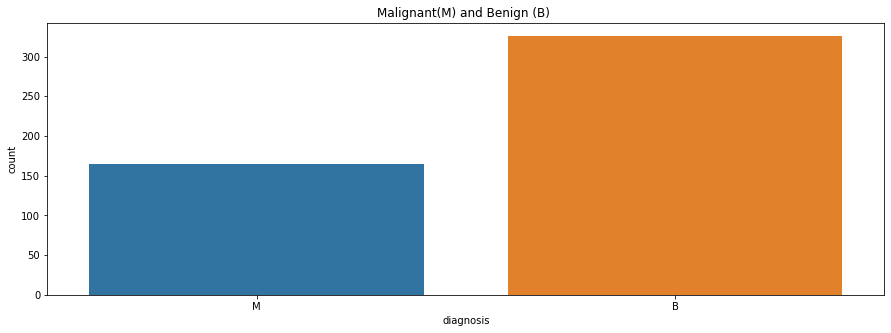

In [33]:
plt.figure(figsize=(15,5))
plt.title("Malignant(M) and Benign (B) ")

sns.countplot(x='diagnosis',data=df)

In [34]:
encode=LabelEncoder()
fienc=encode.fit_transform(df["diagnosis"])
df["diagnosis"]=fienc

#### Feature Scaling

In [35]:
scaler=StandardScaler()
final=scaler.fit_transform(df.iloc[:,1:])
df.iloc[:,1:]=final

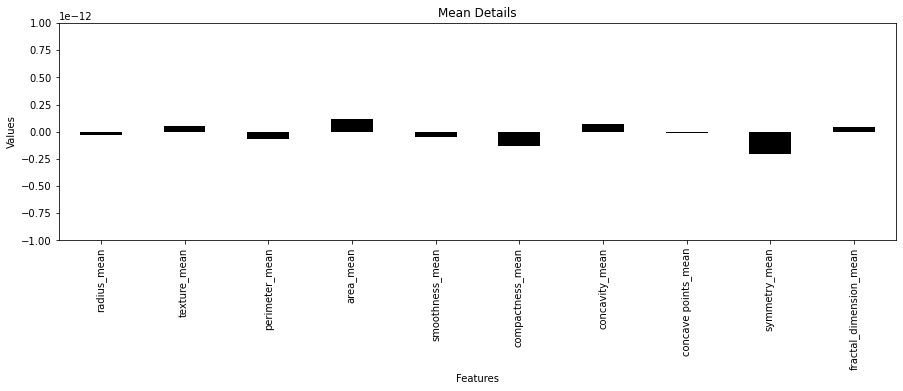

In [36]:
plt.figure(figsize=(15,4))
plt.title("Mean Details")
plt.xlabel("Features")
plt.ylabel("Values")
df.iloc[:,1:11].sum().plot(kind='bar',color='black')

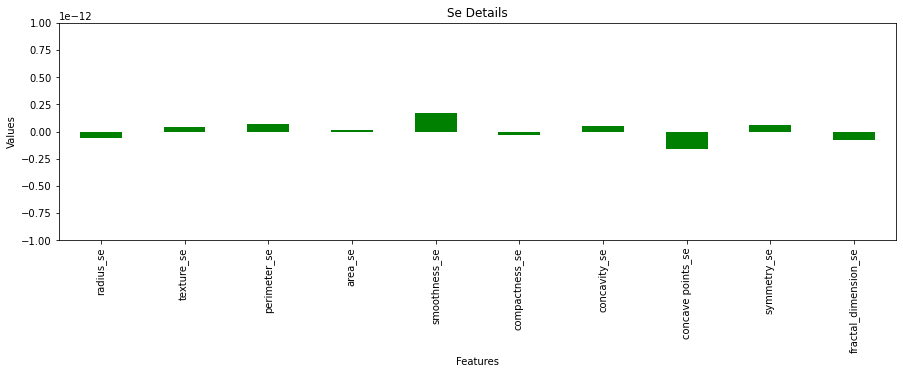

In [37]:
plt.figure(figsize=(15,4))
plt.title("Se Details")
plt.xlabel("Features")
plt.ylabel("Values")
df.iloc[:,11:21].sum().plot(kind='bar',color='green')

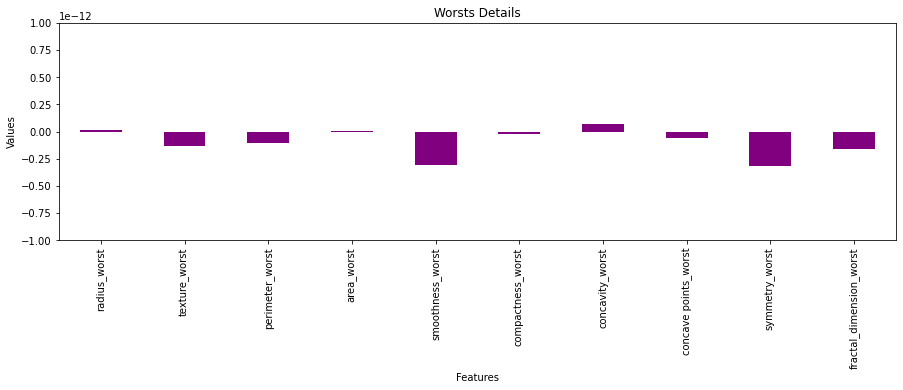

In [38]:
plt.figure(figsize=(15,4))
plt.title("Worsts Details")
plt.xlabel("Features")
plt.ylabel("Values")
df.iloc[:,21:].sum().plot(kind='bar',color='purple')

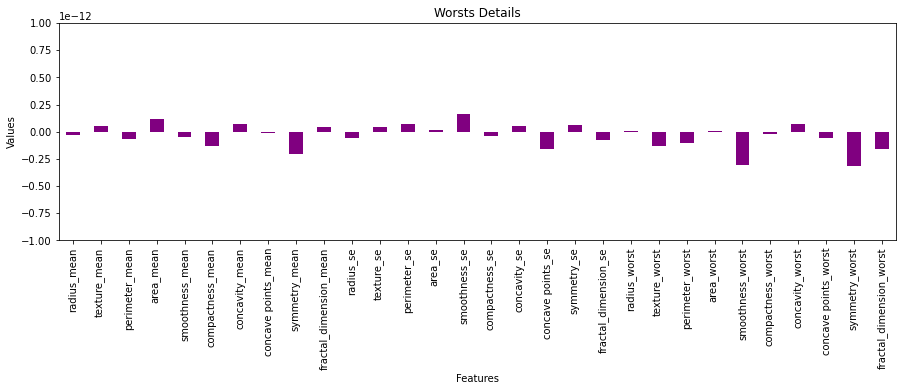

In [39]:
plt.figure(figsize=(15,4))
plt.title("Worsts Details")
plt.xlabel("Features")
plt.ylabel("Values")
df.iloc[:,1:].sum().plot(kind='bar',color='purple')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


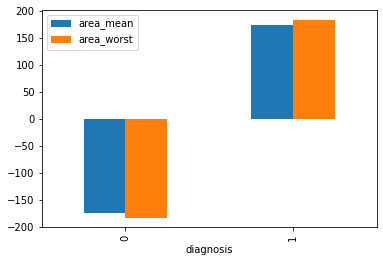

In [40]:

amw=df.groupby(df["diagnosis"])["area_mean","area_worst"].sum()
amw.plot(kind='bar')

In [41]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.382345,-2.060824,1.599943,1.349526,1.759964,4.048160,3.392439,3.039116,2.687615,...,2.309358,-1.350029,2.832015,2.636900,1.438790,3.385831,2.716852,2.698293,3.600983,2.559185
1,1,2.254127,-0.305356,2.096701,2.512355,-0.850398,-0.448089,0.122879,0.742411,0.125109,...,2.214170,-0.335822,1.918236,2.497529,-0.364895,-0.407068,-0.045472,1.320692,-0.181106,0.471270
2,1,1.956775,0.521306,1.954068,2.072269,1.077516,1.388286,1.817468,2.465910,1.210058,...,1.867589,0.017816,1.695103,1.951106,0.602707,1.476712,1.180922,2.309650,1.582234,0.370648
4,1,2.159515,-1.120140,2.204906,2.408595,0.356293,0.775860,1.826669,1.761345,0.112444,...,1.616196,-1.460124,1.684478,1.654666,0.273911,-0.261370,0.884896,0.912964,-0.969807,-0.384020
5,1,-0.489622,-0.797077,-0.378731,-0.524955,2.488942,1.616534,1.210177,1.062451,1.286046,...,-0.109388,-0.279107,-0.043912,-0.189013,2.232600,2.271716,1.680760,1.114226,2.342330,2.943507


### Correlation between the Features

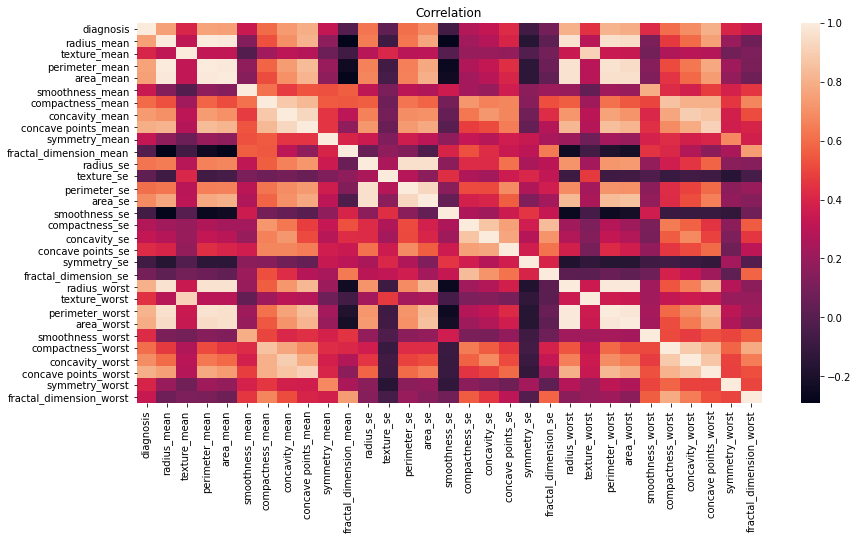

In [42]:
plt.figure(figsize=(14,7))
plt.title("Correlation")
sns.heatmap(df.corr())

In [43]:
df1=df.iloc[:,1:11].copy()
#sns.pairplot(df1)

In [44]:
df2=df.iloc[:,11:21].copy()
df2.head()
#sns.pairplot(df2)

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,3.315012,-0.556215,3.820480,4.053545,-0.169177,1.758604,1.213851,0.842685,1.579829,1.257362
1,0.780946,-0.898985,0.487420,1.332739,-0.634642,-0.720008,-0.504920,0.371569,-0.858543,-0.002330
2,1.709568,-0.792994,1.249574,2.017057,-0.267900,1.139640,0.459901,1.741048,0.442224,0.489523
4,1.762868,-0.804193,1.797272,2.031120,1.849294,0.074719,1.367967,1.411076,-0.304093,0.747047
5,-0.179380,-0.586412,-0.270882,-0.275665,0.271311,0.684033,0.381619,-0.015624,0.313809,0.731425


In [45]:
df3=df.iloc[:,21:]
#sns.pairplot(df3)


### Machine Learning Prediction

### Logistic Regression

In [46]:
X=df.iloc[:,1:].values
y=df.iloc[:,:1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




### Model Fitting and Prediction

In [47]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
prediction=logistic.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Actual vs Predicted Value 

x=y_test.reshape(-1)
y=prediction.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df3=pd.DataFrame(my_d)

df3.head()

### Confusion Matrix

In [48]:
lo=confusion_matrix(y_test,prediction)
lo

array([[72,  2],
       [ 3, 22]])

In [49]:
print("Train Score {:.3f}".format(logistic.score(X_test,y_test)))
print("Test Score :",logistic.score(X_test,prediction))

Train Score 0.949
Test Score : 1.0


### Logistic Regression Shows good Prediction

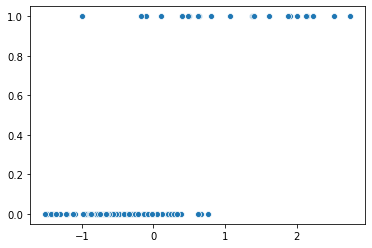

In [50]:
sns.scatterplot(x=X_test[:,0],y=prediction,data=df)

### Decision Tree Algorithm

### Model Fitting and Prediction

In [51]:
decision=DecisionTreeClassifier(max_depth=3)
decision.fit(X_train,y_train)
y_pred=decision.predict(X_test)


### Actual vs Predicted

In [52]:
x=y_test.reshape(-1)
y=y_pred.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df4=pd.DataFrame(my_d)

df4.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


### Confusion Matrix

In [53]:
l=confusion_matrix(y_test,y_pred)
l

array([[72,  2],
       [ 3, 22]])

In [54]:
print("Train Score {:.3f}".format(decision.score(X_test,y_test)))
print("Test Score :",decision.score(X_test,y_pred))

Train Score 0.949
Test Score : 1.0


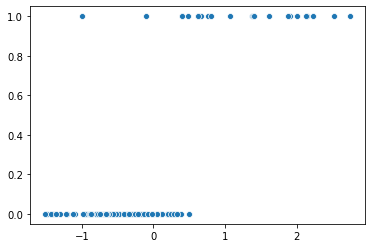

In [55]:
sns.scatterplot(x=X_test[:,0],y=y_pred,data=df)

### Generalized Form 

### Random Forest Classifier

### Model Fitting and Prediction

In [56]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_p=rf.predict(X_test)
                         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### Actual vs Predicted

In [57]:
x=y_test.reshape(-1)
y=y_p.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df5=pd.DataFrame(my_d)

df5.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [58]:
lo=confusion_matrix(y_test,y_p)
lo

array([[70,  4],
       [ 2, 23]])

In [59]:
print("Train Score {:.3f}".format(rf.score(X_test,y_test)))
print("Test Score :",rf.score(X_test,y_p))

Train Score 0.939
Test Score : 1.0


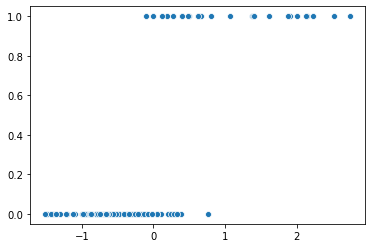

In [60]:
sns.scatterplot(x=X_test[:,0],y=y_p,data=df)

## Not bad Model

### Support Vector Machine

In [61]:
from sklearn.svm import SVC
sv=SVC(gamma='auto')

## Model Fitting and Prediction

In [62]:

sv.fit(X_train,y_train)
ys=sv.predict(X_test)
                         

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Actual vs Predicted

In [63]:
x=y_test.reshape(-1)
y=ys.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df6=pd.DataFrame(my_d)

df6.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [64]:
lo=confusion_matrix(y_test,ys)
lo

array([[74,  0],
       [ 1, 24]])

In [65]:
print("Train Score {:.3f}".format(sv.score(X_test,y_test)))
print("Test Score :",sv.score(X_test,y_p))

Train Score 0.990
Test Score : 0.9292929292929293


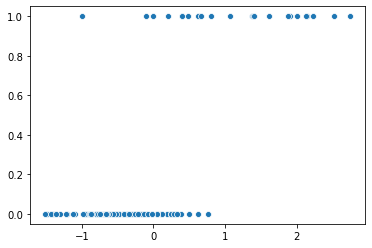

In [66]:
sns.scatterplot(x=X_test[:,0],y=ys,data=df)

#### We got OverFitting result, which is not good

### K-Nearest Neighbors (KNN)

In [67]:
knn=KNeighborsClassifier(n_neighbors=3)


#### Model Fitting and Prediction

In [68]:
knn.fit(X_train,y_train)
yk=knn.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


#### Actual vs Predicted

In [69]:
x=y_test.reshape(-1)
y=yk.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df7=pd.DataFrame(my_d)

df7.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,0,0
4,0,0


In [70]:
lo=confusion_matrix(y_test,yk)
lo

array([[72,  2],
       [ 0, 25]])

In [71]:
print("Train Score {:.3f}".format(knn.score(X_test,y_test)))
print("Test Score :",knn.score(X_test,yk))

Train Score 0.980
Test Score : 1.0


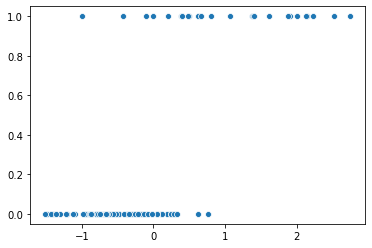

In [72]:
sns.scatterplot(x=X_test[:,0],y=yk,data=df)

#### Very Good Generalized

### Naive Bayes Model

### Model Fitting and Prediction

In [73]:
gb=GaussianNB()
gb.fit(X_train,y_train)
#prediction
nb=gb.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Real Vs Predicted

In [74]:
x=y_test.reshape(-1)
y=nb.reshape(-1)

my_d={'Actual':x,'Predicted':y}

df8=pd.DataFrame(my_d)

df8.head()

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [75]:
lo=confusion_matrix(y_test,nb)
lo

array([[69,  5],
       [ 2, 23]])

In [76]:
print("Train Score {:.3f}".format(gb.score(X_test,y_test)))
print("Test Score :",gb.score(X_test,nb))

Train Score 0.929
Test Score : 1.0


#### Model is nice

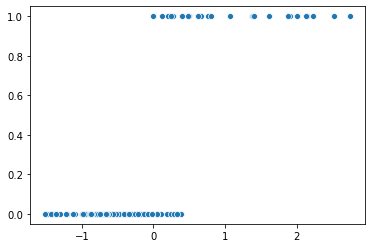

In [77]:
sns.scatterplot(x=X_test[:,0],y=nb,data=df)

## Making DataFrame of All the Train and Test Score

In [78]:
accuracy={'Algorithm/Model':['Logistic Regression','Decision Tree','Random Forest','Support VM','KNN','Naive Byes'],
         'Training Score':[0.94,0.949,0.96,0.88,0.98,0.929],
         'Testing Score':[1.0,1.0,1.0,1.0,1.0,1.0,]}
inx=[1,2,3,4,5,6]
df9=pd.DataFrame(accuracy)
df9.index=inx

df9

,Algorithm/Model,Training Score,Testing Score
1,Logistic Regression,0.940,1.0
2,Decision Tree,0.949,1.0
3,Random Forest,0.960,1.0
4,Support VM,0.880,1.0
5,KNN,0.980,1.0
6,Naive Byes,0.929,1.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


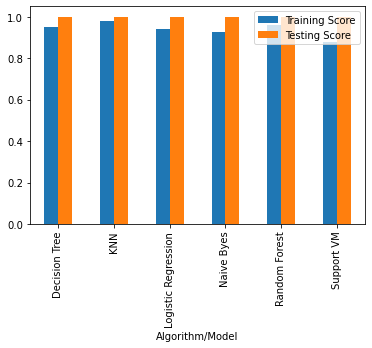

In [79]:

acc=df9.groupby("Algorithm/Model")["Training Score","Testing Score"].sum()
acc.plot(kind='bar')

## Final Test

#### Suppose there is one Patient having some symptoms about Breast Cancer but confused
#### We can now test the Patient using our Model
#### Let's Generate some features and Check whether the Patient is having 
#### Malignant or Benign tumor
#### KNN was the best overall model, so lets use this

#### Generate the Data make user friendly model

In [84]:
class Final():
    def __init__(self,test_patient):
        self.test_patient=test_patient
        
   
    def final_test(self):
        if knn.predict(s)==1:
            print("Person has Melignant tumor")
            print("It's Dangerous\n")
        else:
            print("Person has Benign tumor")
            print("It is not Dangerous")
        return self
# Driver code
def main():
    
    x=np.linspace(-1,2,num=30).reshape(1,-1)

    s=np.array([          0.0510181 ,  1.92282946,  0.05458026, -0.08379586,
         0.27796688,  0.31936506, -0.52551165, -0.06754081, -1.035829  ,
        -0.09068579, -0.04153437,  0.61708015,  0.15995659, -0.18476567,
         0.17060519,  0.22429082, -0.40168617,  0.91707162,  0.18539433,
         0.83651807, -0.15088029,  1.29224671, -0.15724862, -0.26622014,
        -0.35080325, -0.09191711, -0.68568759, -0.08813913, -1.20274003,
         0.06528701]).reshape(1,-1)

    my_t=Final(s)
    my_c=Final(x)          
    my_t.final_test()
    my_c.final_test()
main()

Person has Benign tumor
It is not Dangerous
Person has Benign tumor
It is not Dangerous


#### Project by : Nishant Banjade
#### 2020-12-16
#### Thank you 